A basic SIR model can be written as:
\begin{align}
\dot S &= -\beta SI\\
\dot I &= \beta SI - \gamma I\\
\dot R &= \gamma I
\end{align}
with
\begin{align}
    S+I+R = 1
\end{align}
where $S$,$I$,$R$ describe the proportion of susceptible, infected and recovered people within a population of $N$ individuals. $\beta$ and $\gamma$ are the transition rates for getting infected and recovered.\
In terms of simplicity, $\beta$ and $\gamma$ are assumed to be constant over time.\
Moreover, within the short time of the spread of an infection, we do not take any birth or death processes into account, which means $N$ is also constant by assumption.\
Interesting case:
\begin{align}
S = \frac{\alpha}{\beta}\\
\Rightarrow \dot I = 0\\
S_{\infty}\leq \frac{\alpha}{\beta}\\ 
\end{align}
Reproduction ratio:
\begin{align}
R_0 = S \frac{\beta}{\alpha}
\end{align}

In [ ]:
import matplotlib.pyplot as plt

def iteration(S, I, R, beta, gamma):
    N = S + I + R
    S = S - beta*((S*I)/N)
    I = I + beta*((S*I)/N) - gamma*I
    R = R + gamma*I
    return S, I, R

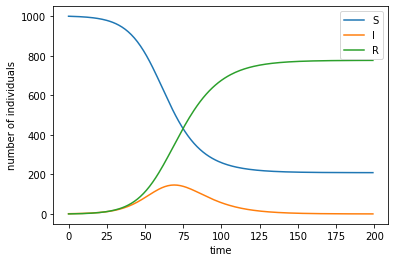

In [ ]:
S = 1000
I = 1
R = 0
beta = 0.2
gamma = 0.1
steps = 200

data = []

for _ in range(steps):
  S, I, R = iteration(S, I, R, beta, gamma)
  data.append([S, I, R])

plt.plot(data)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R'))
plt.show()

In [15]:
import matplotlib.pyplot as plt

def lockdowniteration(S, I, R, beta, gamma, u, I_threshold):
    N = S + I + R
    if I >= I_threshold:
      u = 0.5
    else:
      u = 1
    S = S - u*beta*((S*I)/N)
    I = I + u*beta*((S*I)/N) - gamma*I
    R = R + gamma*I
    return S, I, R, u

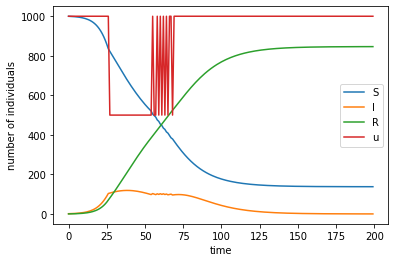

In [21]:
S = 1000
I = 1
R = 0
beta = 0.3
gamma = 0.1
steps = 200
I_threshold = 100

data = []

for _ in range(steps):
  S, I, R, u = lockdowniteration(S, I, R, beta, gamma, u, I_threshold)
  data.append([S, I, R, u*1000])

plt.plot(data)
plt.xlabel('time')
plt.ylabel('number of individuals')
plt.legend(('S', 'I', 'R', 'u*1000'))
plt.show()